In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.linear_model import LogisticRegression 
from sklearn.model_selection import train_test_split
from sklearn import metrics

import warnings
warnings.filterwarnings("ignore")

In [2]:
df=pd.read_csv(r"E:\Linear regression projects\athlete_events.csv")

In [3]:
df

,ID,Name,Sex,Team,Name Of Country,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
271111,135569,Andrzej ya,M,Poland-1,POL,1976 Winter,1976,Winter,Innsbruck,Luge,Luge Mixed (Men)'s Doubles,NaN
271112,135570,Piotr ya,M,Poland,POL,2014 Winter,2014,Winter,Sochi,Ski Jumping,"Ski Jumping Men's Large Hill, Individual",NaN
271113,135570,Piotr ya,M,Poland,POL,2014 Winter,2014,Winter,Sochi,Ski Jumping,"Ski Jumping Men's Large Hill, Team",NaN
271114,135571,Tomasz Ireneusz ya,M,Poland,POL,1998 Winter,1998,Winter,Nagano,Bobsleigh,Bobsleigh Men's Four,NaN


In [4]:
df.shape

(271116, 12)

In [5]:
df.size

3253392

In [6]:
df.head()

,ID,Name,Sex,Team,Name Of Country,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271116 entries, 0 to 271115
Data columns (total 12 columns):
 #   Column           Non-Null Count   Dtype 
---  ------           --------------   ----- 
 0   ID               271116 non-null  int64 
 1   Name             271116 non-null  object
 2   Sex              271116 non-null  object
 3   Team             271116 non-null  object
 4   Name Of Country  271116 non-null  object
 5   Games            271116 non-null  object
 6   Year             271116 non-null  int64 
 7   Season           271116 non-null  object
 8   City             271116 non-null  object
 9   Sport            271116 non-null  object
 10  Event            271116 non-null  object
 11  Medal            39783 non-null   object
dtypes: int64(2), object(10)
memory usage: 24.8+ MB


In [8]:
df.tail()

,ID,Name,Sex,Team,Name Of Country,Games,Year,Season,City,Sport,Event,Medal
271111,135569,Andrzej ya,M,Poland-1,POL,1976 Winter,1976,Winter,Innsbruck,Luge,Luge Mixed (Men)'s Doubles,NaN
271112,135570,Piotr ya,M,Poland,POL,2014 Winter,2014,Winter,Sochi,Ski Jumping,"Ski Jumping Men's Large Hill, Individual",NaN
271113,135570,Piotr ya,M,Poland,POL,2014 Winter,2014,Winter,Sochi,Ski Jumping,"Ski Jumping Men's Large Hill, Team",NaN
271114,135571,Tomasz Ireneusz ya,M,Poland,POL,1998 Winter,1998,Winter,Nagano,Bobsleigh,Bobsleigh Men's Four,NaN
271115,135571,Tomasz Ireneusz ya,M,Poland,POL,2002 Winter,2002,Winter,Salt Lake City,Bobsleigh,Bobsleigh Men's Four,NaN


In [9]:
df.describe()

,ID,Year
count,271116.000000,271116.000000
mean,68248.954396,1978.378480
std,39022.286345,29.877632
min,1.000000,1896.000000
25%,34643.000000,1960.000000
50%,68205.000000,1988.000000
75%,102097.250000,2002.000000
max,135571.000000,2016.000000


In [10]:
df.isnull()

,ID,Name,Sex,Team,Name Of Country,Games,Year,Season,City,Sport,Event,Medal
0,False,False,False,False,False,False,False,False,False,False,False,True
1,False,False,False,False,False,False,False,False,False,False,False,True
2,False,False,False,False,False,False,False,False,False,False,False,True
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...
271111,False,False,False,False,False,False,False,False,False,False,False,True
271112,False,False,False,False,False,False,False,False,False,False,False,True
271113,False,False,False,False,False,False,False,False,False,False,False,True
271114,False,False,False,False,False,False,False,False,False,False,False,True


In [11]:
df.isnull().sum()

ID                      0
Name                    0
Sex                     0
Team                    0
Name Of Country         0
Games                   0
Year                    0
Season                  0
City                    0
Sport                   0
Event                   0
Medal              231333
dtype: int64

In [12]:
df.notnull()

,ID,Name,Sex,Team,Name Of Country,Games,Year,Season,City,Sport,Event,Medal
0,True,True,True,True,True,True,True,True,True,True,True,False
1,True,True,True,True,True,True,True,True,True,True,True,False
2,True,True,True,True,True,True,True,True,True,True,True,False
3,True,True,True,True,True,True,True,True,True,True,True,True
4,True,True,True,True,True,True,True,True,True,True,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
271111,True,True,True,True,True,True,True,True,True,True,True,False
271112,True,True,True,True,True,True,True,True,True,True,True,False
271113,True,True,True,True,True,True,True,True,True,True,True,False
271114,True,True,True,True,True,True,True,True,True,True,True,False


In [13]:
df.isna().sum()

ID                      0
Name                    0
Sex                     0
Team                    0
Name Of Country         0
Games                   0
Year                    0
Season                  0
City                    0
Sport                   0
Event                   0
Medal              231333
dtype: int64

In [14]:
(df.isnull().sum()/(len(df)))*100

ID                  0.000000
Name                0.000000
Sex                 0.000000
Team                0.000000
Name Of Country     0.000000
Games               0.000000
Year                0.000000
Season              0.000000
City                0.000000
Sport               0.000000
Event               0.000000
Medal              85.326207
dtype: float64

In [15]:
df.drop

<bound method DataFrame.drop of             ID                      Name Sex            Team Name Of Country  \
0            1                 A Dijiang   M           China             CHN   
1            2                  A Lamusi   M           China             CHN   
2            3       Gunnar Nielsen Aaby   M         Denmark             DEN   
3            4      Edgar Lindenau Aabye   M  Denmark/Sweden             DEN   
4            5  Christine Jacoba Aaftink   F     Netherlands             NED   
...        ...                       ...  ..             ...             ...   
271111  135569                Andrzej ya   M        Poland-1             POL   
271112  135570                  Piotr ya   M          Poland             POL   
271113  135570                  Piotr ya   M          Poland             POL   
271114  135571        Tomasz Ireneusz ya   M          Poland             POL   
271115  135571        Tomasz Ireneusz ya   M          Poland             POL   

       

In [16]:
df

,ID,Name,Sex,Team,Name Of Country,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
271111,135569,Andrzej ya,M,Poland-1,POL,1976 Winter,1976,Winter,Innsbruck,Luge,Luge Mixed (Men)'s Doubles,NaN
271112,135570,Piotr ya,M,Poland,POL,2014 Winter,2014,Winter,Sochi,Ski Jumping,"Ski Jumping Men's Large Hill, Individual",NaN
271113,135570,Piotr ya,M,Poland,POL,2014 Winter,2014,Winter,Sochi,Ski Jumping,"Ski Jumping Men's Large Hill, Team",NaN
271114,135571,Tomasz Ireneusz ya,M,Poland,POL,1998 Winter,1998,Winter,Nagano,Bobsleigh,Bobsleigh Men's Four,NaN


<Axes: >

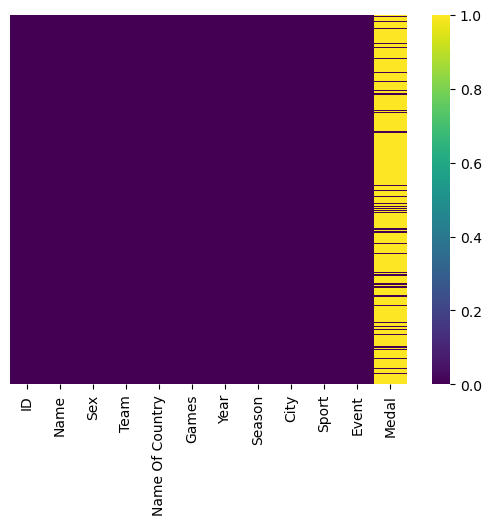

In [18]:
sns.heatmap(df.isnull(),yticklabels=False,cmap='viridis')

In [19]:
cat_data=df.select_dtypes(include=object)
num_data=df.select_dtypes(exclude=object)

In [20]:
cat_data

,Name,Sex,Team,Name Of Country,Games,Season,City,Sport,Event,Medal
0,A Dijiang,M,China,CHN,1992 Summer,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,A Lamusi,M,China,CHN,2012 Summer,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,Gunnar Nielsen Aaby,M,Denmark,DEN,1920 Summer,Summer,Antwerpen,Football,Football Men's Football,NaN
3,Edgar Lindenau Aabye,M,Denmark/Sweden,DEN,1900 Summer,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,Christine Jacoba Aaftink,F,Netherlands,NED,1988 Winter,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN
...,...,...,...,...,...,...,...,...,...,...
271111,Andrzej ya,M,Poland-1,POL,1976 Winter,Winter,Innsbruck,Luge,Luge Mixed (Men)'s Doubles,NaN
271112,Piotr ya,M,Poland,POL,2014 Winter,Winter,Sochi,Ski Jumping,"Ski Jumping Men's Large Hill, Individual",NaN
271113,Piotr ya,M,Poland,POL,2014 Winter,Winter,Sochi,Ski Jumping,"Ski Jumping Men's Large Hill, Team",NaN
271114,Tomasz Ireneusz ya,M,Poland,POL,1998 Winter,Winter,Nagano,Bobsleigh,Bobsleigh Men's Four,NaN


In [21]:
df.replace

<bound method DataFrame.replace of             ID                      Name Sex            Team Name Of Country  \
0            1                 A Dijiang   M           China             CHN   
1            2                  A Lamusi   M           China             CHN   
2            3       Gunnar Nielsen Aaby   M         Denmark             DEN   
3            4      Edgar Lindenau Aabye   M  Denmark/Sweden             DEN   
4            5  Christine Jacoba Aaftink   F     Netherlands             NED   
...        ...                       ...  ..             ...             ...   
271111  135569                Andrzej ya   M        Poland-1             POL   
271112  135570                  Piotr ya   M          Poland             POL   
271113  135570                  Piotr ya   M          Poland             POL   
271114  135571        Tomasz Ireneusz ya   M          Poland             POL   
271115  135571        Tomasz Ireneusz ya   M          Poland             POL   

    

In [22]:
df=df['Sex']=pd.to_numeric(df['Sex'],errors='coerce')

In [23]:
num_data

,ID,Year
0,1,1992
1,2,2012
2,3,1920
3,4,1900
4,5,1988
...,...,...
271111,135569,1976
271112,135570,2014
271113,135570,2014
271114,135571,1998


In [25]:
for i in df.columns:
    sns.boxplot(x=df[i])
    plt.show()

AttributeError: 'Series' object has no attribute 'columns'

In [26]:
sns.set(style="ticks")
sns.pairplot(df,diag_kind="kde",markers="o")
plt.show()

TypeError: 'data' must be pandas DataFrame object, not: <class 'pandas.core.series.Series'>

In [27]:
a=df.sample(10)
sns.lineplot(x="ID",y="Team",data=a)
plt.show()

ValueError: Could not interpret value `ID` for parameter `x`

In [28]:
a=df.sample(30)
sns.lineplot(x="Year",y="Name",data=a)
plt.xticks(rotation=90)
plt.show()

ValueError: Could not interpret value `Year` for parameter `x`

<Axes: >

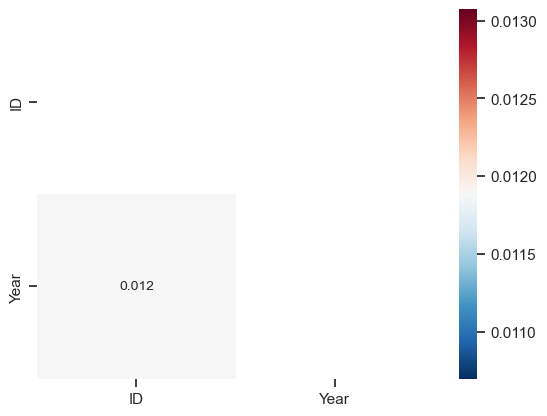

In [85]:
corr=df.corr()
msk=np.triu(np.ones_like(corr))
sns.heatmap(corr,cmap=plt.cm.RdBu_r,annot=True,annot_kws={'size':10},mask=msk)

<Axes: xlabel='Year'>

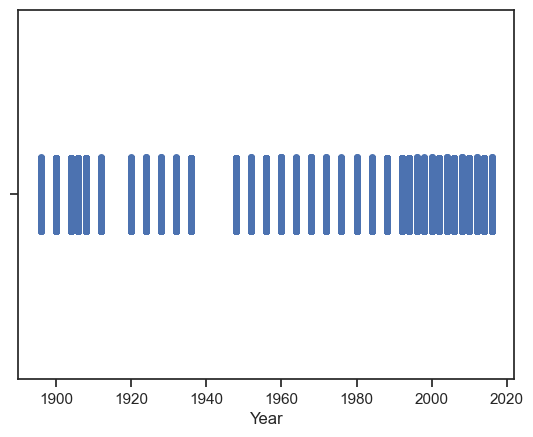

In [88]:
sns.stripplot(x="Year",data=df)

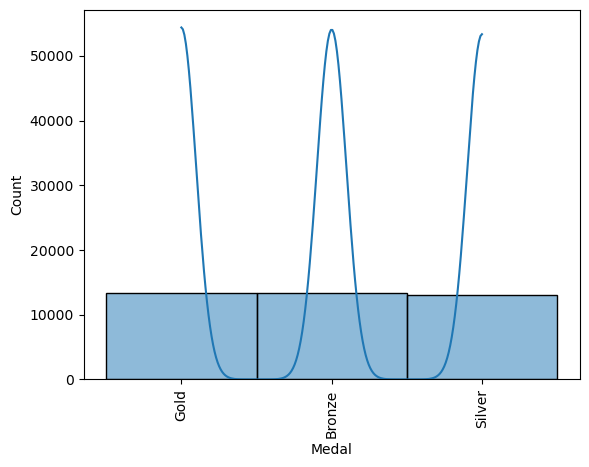

In [18]:
sns.histplot(df["Medal"],bins=10,kde=True)
plt.xticks(rotation=90)
plt.show()

<Axes: xlabel='Medal'>

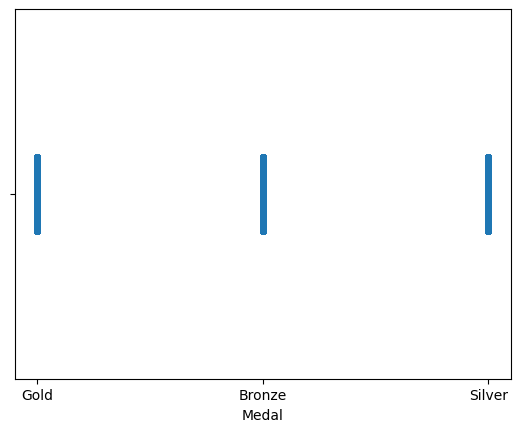

In [19]:
sns.stripplot(x="Medal",data=df)

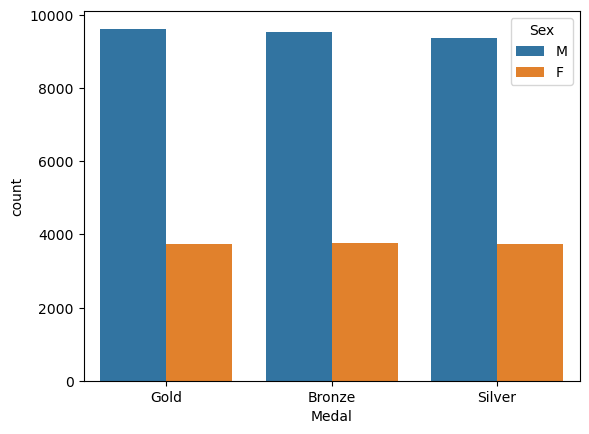

In [20]:
sns.countplot(x=df['Medal'],hue=df['Sex'])
plt.show()

In [21]:
a=df.groupby("Medal")["Medal"].count()

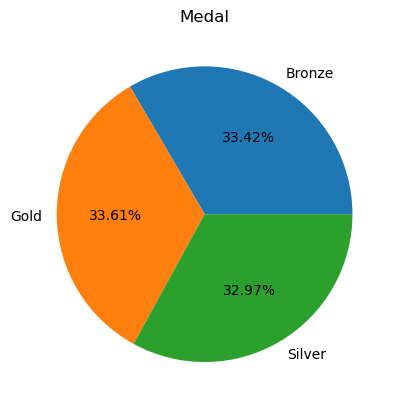

In [22]:
plt.pie(a,labels=a.index,autopct="%.2f%%")
plt.title("Medal")
plt.show()

In [23]:
from sklearn.preprocessing import OneHotEncoder,StandardScaler
categorical_cols=["Year","City"]
encoder=OneHotEncoder(drop='first',sparse=False)
encoder_cols=pd.DataFrame(encoder.fit_transform(df[categorical_cols]),columns=encoder.get_feature_names_out(categorical_cols))

In [24]:
numerical_cols=["ID","Year"]
scaler=StandardScaler()
scaled_cols=pd.DataFrame(scaler.fit_transform(df[numerical_cols]),columns=scaler.get_feature_names_out(numerical_cols))

In [113]:
x=pd.concat([encoder_cols,scaled_cols],axis=1)
y=df['Sex']

In [114]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [115]:
log=LogisticRegression()

In [116]:
log.fit(x_train,y_train)

LogisticRegression()

In [117]:
print('Train Score:',log.score(x_train,y_train))

Train Score: 0.7248031278239861


In [118]:
print('Test Score:',log.score(x_test,y_test))

Test Score: 0.7264311006196518


In [119]:
pred_train=log.predict(x_train)
pred_test=log.predict(x_test)

In [120]:
print(metrics.classification_report(y_train,pred_train))

              precision    recall  f1-score   support

           F       0.00      0.00      0.00     59688
           M       0.72      1.00      0.84    157204

    accuracy                           0.72    216892
   macro avg       0.36      0.50      0.42    216892
weighted avg       0.53      0.72      0.61    216892



In [121]:
print(metrics.classification_report(y_test,pred_test))

              precision    recall  f1-score   support

           F       0.00      0.00      0.00     14834
           M       0.73      1.00      0.84     39390

    accuracy                           0.73     54224
   macro avg       0.36      0.50      0.42     54224
weighted avg       0.53      0.73      0.61     54224



In [122]:
from sklearn.metrics import matthews_corrcoef, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

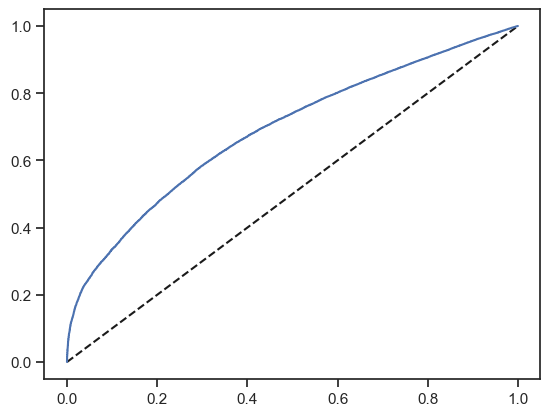

In [123]:
y_train_binary = label_binarize(y_train, classes=['F', 'M'])


fpr, tpr, threshold = metrics.roc_curve(y_train_binary[:, 0],roc)
plt.plot([0, 1], [0, 1], "k--")
plt.plot(fpr, tpr, label='logistic')
plt.show()

In [124]:
metrics.roc_auc_score(y_train,roc)

0.6901432210989167

In [125]:
from sklearn.metrics import matthews_corrcoef

mcc=matthews_corrcoef(y_test,pred_test)
print('MCC:',mcc)

MCC: 0.0


In [126]:
param_grid={
    'penalty':['l1','l2'],
    'C':[0.1,0.5,1,5,10]
}

In [127]:
from sklearn.model_selection import GridSearchCV

In [128]:
grid=GridSearchCV(estimator=log, param_grid=param_grid, cv= 5)

In [129]:
grid.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [0.1, 0.5, 1, 5, 10], 'penalty': ['l1', 'l2']})

In [57]:
best_param = grid.best_params_
best_model = grid.best_estimator_


In [58]:
y_pred = best_model.predict(x_test)

In [157]:
from sklearn.metrics import accuracy_score , precision_score,recall_score,f1_score,roc_auc_score

In [31]:
acc=accuracy_score(y_test,y_pred)
pre=precision_score(y_test,y_pred)
rec=recall_score(y_test,y_pred)
f1=f1_score(y_test,y_pred)
roc_auc=roc_auc_score(y_test,y_pred)

NameError: name 'accuracy_score' is not defined